# Demos: Lecture 18

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

## Exercise 1

Consider two qubits interacting under the Hamiltonian
  \begin{equation*}
    \hat{H} = -3 (Z_{0} + Z_{1}) + 2 Z_{0} Z_{1} + 4(X_{0} + X_{1})
  \end{equation*}
 
What is the energy of the system if the qubits are in state
  \begin{equation*}
    \ket{\psi} = \ket{+} \otimes \ket{0}
  \end{equation*}

In [4]:
coeffs = [-3, -3, 2, 4, 4]
obs = [qml.PauliZ(0), qml.PauliZ(1), qml.PauliZ(0) @ qml.PauliZ(1), qml.PauliX(0), qml.PauliX(1)]

H = qml.Hamiltonian(coeffs, obs)

In [5]:
H

  (-3) [Z0]
+ (-3) [Z1]
+ (4) [X0]
+ (4) [X1]
+ (2) [Z0 Z1]


In [7]:
qml.matrix(H)

array([[-4.+0.j,  4.+0.j,  4.+0.j,  0.+0.j],
       [ 4.+0.j, -2.+0.j,  0.+0.j,  4.+0.j],
       [ 4.+0.j,  0.+0.j, -2.+0.j,  4.+0.j],
       [ 0.+0.j,  4.+0.j,  4.+0.j,  8.+0.j]])

In [8]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def prepare_and_measure_expval():
    qml.Hadamard(wires=0)
    return qml.expval(H)

In [9]:
prepare_and_measure_expval()

tensor(1., requires_grad=True)

In [10]:
np.linalg.eig(qml.matrix(H))

EigResult(eigenvalues=array([-9.56829032+0.j,  0.61040619+0.j, 10.95788413+0.j, -2.        +0.j]), eigenvectors=array([[ 0.6951503 +0.j,  0.69783435+0.j,  0.17260733+0.j,
        -0.        -0.j],
       [-0.48384983+0.j,  0.40216247+0.j,  0.32273005+0.j,
         0.70710678+0.j],
       [-0.48384983+0.j,  0.40216247+0.j,  0.32273005+0.j,
        -0.70710678-0.j],
       [ 0.22032871+0.j, -0.43538249+0.j,  0.87286731+0.j,
        -0.        -0.j]]))

## Demo 2: Time evolution

In [11]:
alpha = 0.3
coeffs = [-alpha, -alpha]
obs = [qml.PauliZ(0), qml.PauliZ(1)]
H = qml.Hamiltonian(coeffs, obs)

In [14]:
@qml.qnode(dev)
def evolution_v1(t):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.RZ(- 2 * alpha * t, wires=0)
    qml.RZ(- 2 * alpha * t, wires=1)
    return qml.expval(qml.PauliX(0))

In [17]:
times = np.linspace(0, 10, 100)
results_v1 = evolution_v1(times)

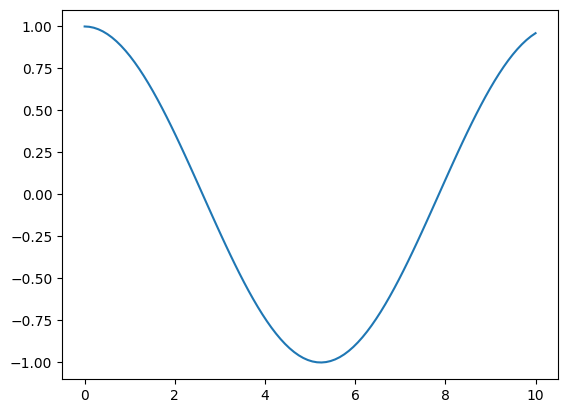

In [18]:
plt.plot(times, results_v1)

In [20]:
@qml.qnode(dev)
def evolution_v2(t):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.evolve(H, t)
    return qml.expval(qml.PauliX(0))

times = np.linspace(0, 10, 100)
results_v2 = evolution_v2(times)

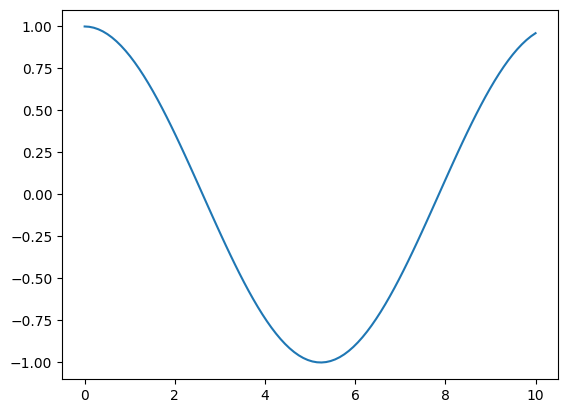

In [21]:
plt.plot(times, results_v2)